In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [165]:
set = pd.read_csv('TASK2_dataset.csv')

key1 = set.keyword_1.unique()
key2 = set.keyword_2.unique()
key3 = set.keyword_3.unique()
keys = np.concatenate([key1, key2, key3])
genre = set.genre



In [166]:
set_keys = np.zeros((len(genre),len(keys)))


for j in range(len(keys)):
    for i in range(len(genre)):
        if ((keys[j] == set.keyword_1[i])|(keys[j] == set.keyword_2[i])|(keys[j] == set.keyword_3[i])):
            set_keys[i,j] = 1

 

In [167]:
tf_keys = np.zeros((len(genre),len(keys)))

 
for i in range(len(genre)):
    for j in range(len(keys)):
            tf_keys[i, j] = set_keys[i,j] / 3  



idf_keys = np.zeros(len(keys))

for i in range(len(idf_keys)):
    idf_keys[i] = np.log10(len(genre) / np.sum(tf_keys[:,i]))



tfidf_keys = tf_keys * idf_keys


In [168]:
tfidf_keys = tfidf_keys - np.mean(tfidf_keys)

cov_keys = np.cov(tfidf_keys.T)

eigenval, eigenvect = np.linalg.eig(cov_keys)

eigen_top = eigenvect[:,np.argsort(eigenval)[::-1][:2]]

tfidf_reduced= np.dot(tfidf_keys,eigen_top)

In [169]:
a = len(keys)//4
index = np.random.randint(1,len(tfidf_reduced),a)
centroids = tfidf_reduced[index]
    
for i in range(1000):
        
    distances = np.linalg.norm(tfidf_reduced[:, None] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
        
        
    new_centroids = np.array([tfidf_reduced[labels == i].mean(axis=0) for i in range(a)])
        
        
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids
    

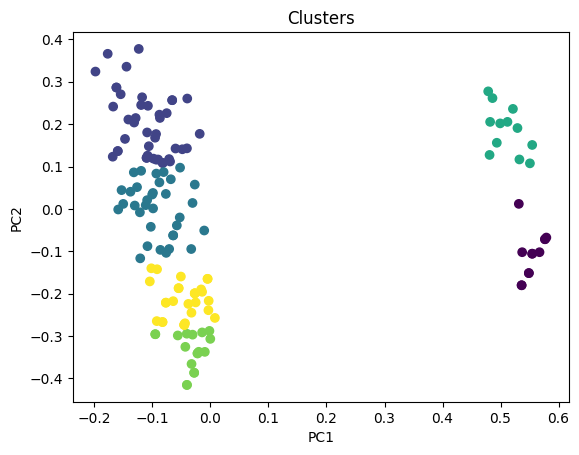

In [170]:
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=labels, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters")
plt.show()

In [171]:
# Create a DataFrame for analysis
results = pd.DataFrame({
    "genre": set["genre"],
    "cluster": labels
})

# Calculate genre distribution per cluster
genre_distribution = pd.crosstab(results["cluster"], results["genre"], normalize="index") * 100
print(genre_distribution)

genre    classical    country    hip-hop        pop       rock
cluster                                                       
0         0.000000  33.333333   0.000000  25.000000  41.666667
1        16.666667   7.142857  35.714286  40.476190   0.000000
2        44.117647  11.764706  29.411765  14.705882   0.000000
3        41.666667   8.333333  41.666667   8.333333   0.000000
4         0.000000  38.888889   0.000000   0.000000  61.111111
5         0.000000  34.482759   0.000000  17.241379  48.275862


In [172]:
def silhouette_score(data, labels):
    n = len(data)
    a = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(n):
        # Compute average distance to points in the same cluster
        cluster = labels[i]
        same_cluster = data[labels == cluster]
        a[i] = np.mean(np.linalg.norm(data[i] - same_cluster, axis=1))
        
        # Compute average distance to points in the nearest neighboring cluster
        other_clusters = [c for c in np.unique(labels) if c != cluster]
        b_values = []
        for c in other_clusters:
            other_cluster = data[labels == c]
            b_values.append(np.mean(np.linalg.norm(data[i] - other_cluster, axis=1)))
        b[i] = np.min(b_values)
    
    scores = (b - a) / np.maximum(a, b)
    return np.mean(scores)

score = silhouette_score(tfidf_reduced, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.4929090414431783
